In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


# Before proceeding with my notebook, I approached it in two ways:

* # I first focused on data visualization, as the dataset is intended for this purpose.
* # Additionally, I utilized advanced techniques in linear regression to build and apply my model.
* # Please ensure to implement these approaches sequentially and judiciously, avoiding simultaneous use to prevent unnecessary complexity.

**# **Introduction****

**Features of the Auto MPG Dataset**:
* mpg: Continuous variable representing miles per gallon.
* cylinders: Multi-valued discrete variable representing the number of cylinders in the car.
* displacement: Continuous variable representing the displacement of the car's engine.
* horsepower: Continuous variable representing the horsepower of the car's engine.
* weight: Continuous variable representing the weight of the car.
* acceleration: Continuous variable representing the acceleration of the car.
* model year: Multi-valued discrete variable representing the model year of the car.
* origin: Multi-valued discrete variable representing the origin of the car (1 for USA, 2 for Europe, 3 for Japan).
* car name: String (usually ignored in regression analysis).

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv(r'/kaggle/input/autompg-dataset/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# **Data Preprocessing Part**

# For this dataset i used visualization and exploratory data analysis but i can also used for building regression models to predict fuel efficiency (mpg).

# Handeling Missing Values

In [4]:
df['mpg'].value_counts()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
24.2     1
22.4     1
25.1     1
20.8     1
18.6     1
Name: count, Length: 129, dtype: int64

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
df = df.drop(['car name'], axis=1)

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.isnull().sum()/len(df)*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 398 entries, 0 to 397

Data columns (total 8 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   mpg           398 non-null    float64

 1   cylinders     398 non-null    int64  

 2   displacement  398 non-null    float64

 3   horsepower    398 non-null    object 

 4   weight        398 non-null    int64  

 5   acceleration  398 non-null    float64

 6   model year    398 non-null    int64  

 7   origin        398 non-null    int64  

dtypes: float64(3), int64(4), object(1)

memory usage: 25.0+ KB


In [11]:
df['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
77      1
132     1
64      1
116     1
82      1
Name: count, Length: 94, dtype: int64

In [12]:
for i in df.columns:
    print("***************************",i,
         "*********************************************************")
    print()
    print(set(df[i].tolist()))
    print()

*************************** mpg *********************************************************



{9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.5, 27.5, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 29.5, 35.0, 31.5, 36.0, 33.5, 36.1, 39.4, 43.1, 35.7, 37.3, 41.5, 38.1, 46.6, 40.8, 44.3, 43.4, 44.6, 44.0, 14.5, 15.5, 16.5, 16.9, 17.5, 17.6, 18.5, 18.6, 18.1, 19.9, 19.4, 19.1, 20.5, 20.6, 21.5, 21.1, 21.6, 22.5, 22.4, 23.9, 23.6, 23.5, 24.5, 25.4, 25.1, 25.5, 26.4, 26.6, 27.4, 27.9, 28.4, 28.1, 29.9, 30.5, 30.9, 31.9, 31.6, 32.8, 32.1, 32.2, 32.7, 32.4, 33.8, 32.3, 33.7, 32.9, 34.1, 34.2, 34.5, 34.3, 34.7, 35.1, 34.4, 34.0, 36.4, 37.2, 37.0, 37.7, 38.0, 39.1, 39.0, 40.9, 16.2, 17.7, 18.2, 19.2, 19.8, 20.2, 20.8, 20.3, 22.3, 23.2, 23.8, 23.7, 24.3, 24.2, 25.8, 26.8, 27.2, 28.8, 29.8, 30.7, 31.8, 31.3}



*************************** cylinders *********************************************************



{3, 4, 5, 6, 8}



************

In [13]:
df['horsepower'] = np.where(df['horsepower']=='?','150',df['horsepower'])

In [14]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [15]:
df['horsepower'].value_counts()

horsepower
150    28
90     20
88     19
110    18
100    17
       ..
103     1
133     1
138     1
116     1
82      1
Name: count, Length: 93, dtype: int64

<Axes: ylabel='horsepower'>

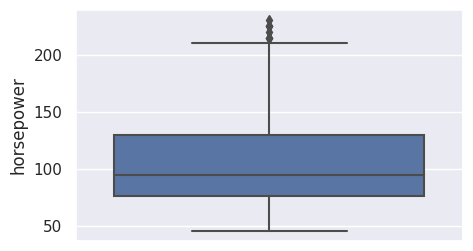

In [16]:
plt.figure(figsize=(5, 3))
sns.boxplot(y = 'horsepower', data = df)

# So as per above info - we can see there is outliers in our 'horsepower' feature

In [17]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [18]:
df.isnull().sum().sum()

0

In [19]:
df['horsepower'].isnull().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 398 entries, 0 to 397

Data columns (total 8 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   mpg           398 non-null    float64

 1   cylinders     398 non-null    int64  

 2   displacement  398 non-null    float64

 3   horsepower    398 non-null    int64  

 4   weight        398 non-null    int64  

 5   acceleration  398 non-null    float64

 6   model year    398 non-null    int64  

 7   origin        398 non-null    int64  

dtypes: float64(3), int64(5)

memory usage: 25.0 KB


# **Check outlier**

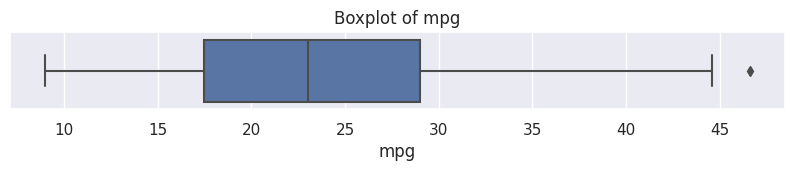

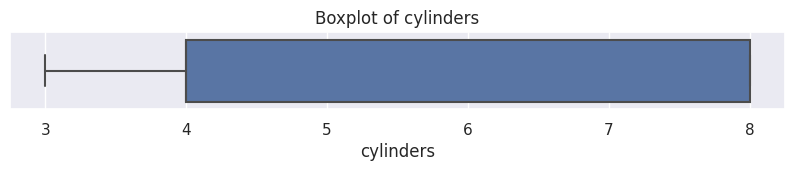

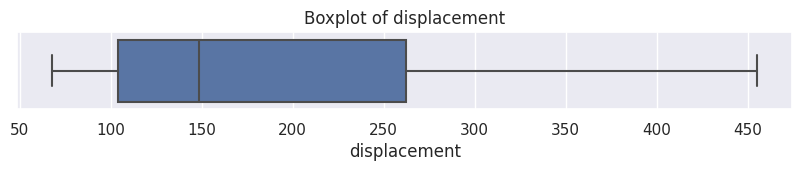

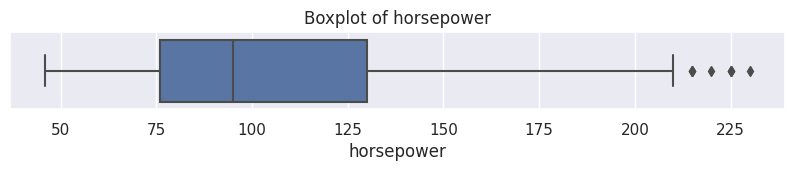

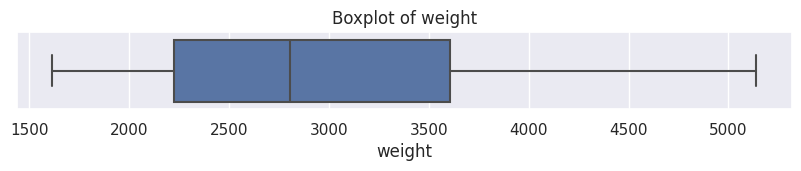

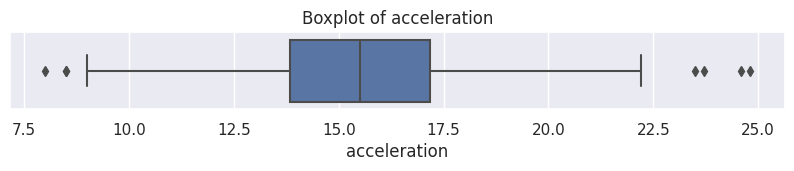

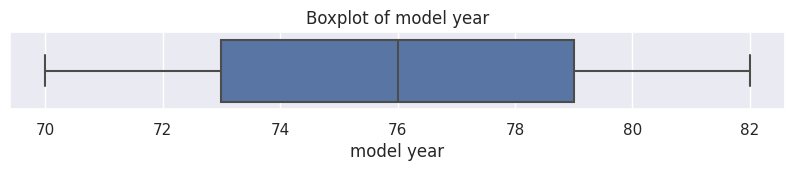

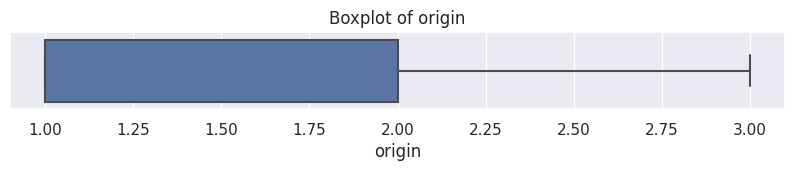

In [21]:
def boxplots(col):
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
for col in df.select_dtypes(exclude=['object', 'category']).columns:
    boxplots(col)

In [22]:
# Ofcourse there is no need to remove outliers but its just for better model performnce

acce_Q1 = df['acceleration'].quantile(0.25)
acce_Q3 = df['acceleration'].quantile(0.75)
acce_iqr = acce_Q3 - acce_Q1

upper_acce = acce_Q3 + 1.5 * acce_iqr
lower_acce = acce_Q1 - 1.5 * acce_iqr

In [23]:
df['acceleration'] = np.where(df['acceleration'] > upper_acce, upper_acce,
                                       np.where(df['acceleration'] < lower_acce, 
                                                lower_acce, df['acceleration'] ))

<Axes: ylabel='acceleration'>

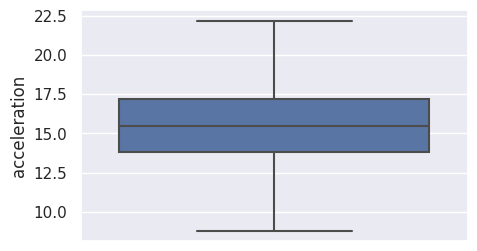

In [24]:
# Checking Outliers in 'acceleration'

plt.figure(figsize=(5, 3))
sns.boxplot(y = 'acceleration', data=df)

# The origin column should be treated as a categorical variable and encoded using One-Hot Encoding (OHE).

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 398 entries, 0 to 397

Data columns (total 8 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   mpg           398 non-null    float64

 1   cylinders     398 non-null    int64  

 2   displacement  398 non-null    float64

 3   horsepower    398 non-null    int64  

 4   weight        398 non-null    int64  

 5   acceleration  398 non-null    float64

 6   model year    398 non-null    int64  

 7   origin        398 non-null    int64  

dtypes: float64(3), int64(5)

memory usage: 25.0 KB


# Handling *origin* column
# We'd map origin column according to the provided description (1 -> USA, 2 -> Europe, 3 -> Asia), and cast its datatype as category.

In [26]:
# parsing origin column
df.loc[df.origin == 1, 'origin'] = 'USA'
df.loc[df.origin == 2, 'origin'] = 'Europe'
df.loc[df.origin == 3, 'origin'] = 'Asia'

# casting origin column into category
df['origin'] = df['origin'].astype('category')

# validating changes
df['origin'].dtype

CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

Now, our dataframe is tidy and clean, and we are ready to move into visualizing it to get some meaningful insights!

# Data Visualization

Let's first have a quick look at the summery statistics of our dataset.

In [27]:
# displaying summary statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.552010,76.010050
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.693089,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.800000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000


* The corr() method in pandas computes the pairwise correlation of columns that contain numerical data only. Since we have categorical data in the origin column, which we converted to string values ('USA', 'Europe', 'Asia'), the corr() method can't handle these non-numeric values.
*  
* To fix this, you need to exclude the origin column or any other non-numeric columns before calculating the correlation matrix.
* 
* Corrected Implementation:
* Parse and categorize the origin column.
* Plot the correlation heatmap excluding non-numeric columns.

In [28]:
numeric_df = df.select_dtypes(include=[np.number])

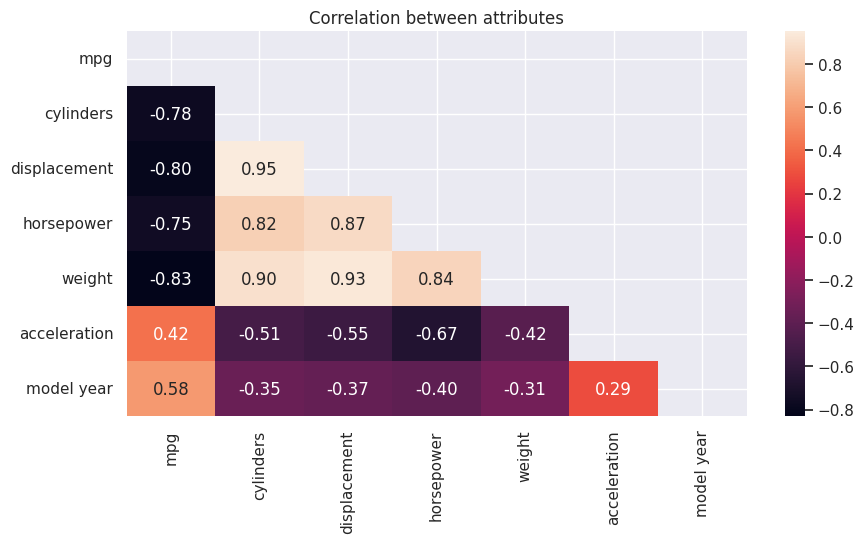

In [29]:
plt.figure(figsize=(10, 5))
corr = numeric_df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f')
plt.title("Correlation between attributes")
plt.show()

_______________________________________________________________________________________________________________________________

Taking a closer look into the model year distribution

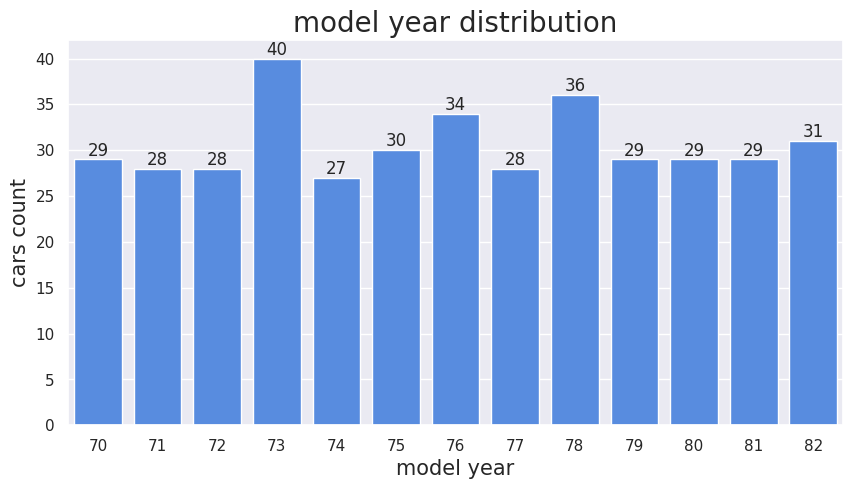

In [30]:
# displaying histgram of model year column
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("model year distribution", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

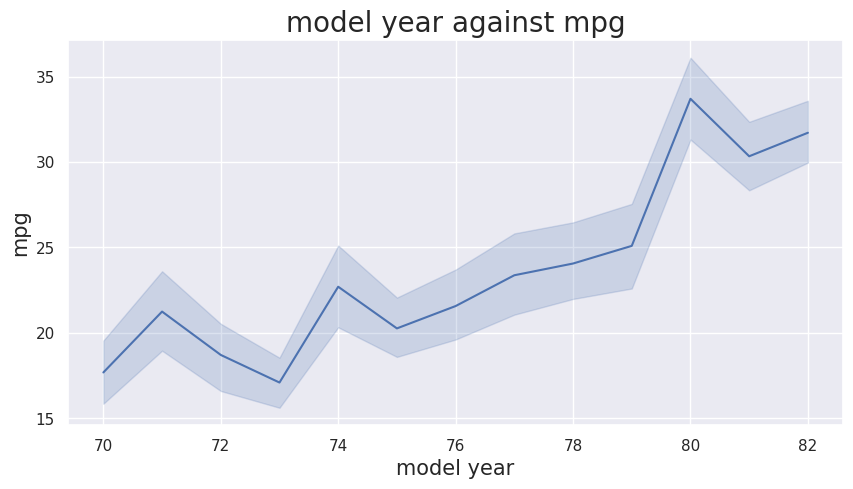

In [31]:
# ploting model year against mpg
plt.figure(figsize=(10,5))
plt.title("model year against mpg", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = df);

* From the above visualizations, we we may totice the following:

* Our dataset contains info about cars from 1970 to 1982.
* Most of the cars are produced in 1973.
* As years pass after 1973, there has been a noticable increase in mpg.

--------------------------------------------------------------------------------------------------------------------------

Now, let's take a closer look at mpg coulmn.

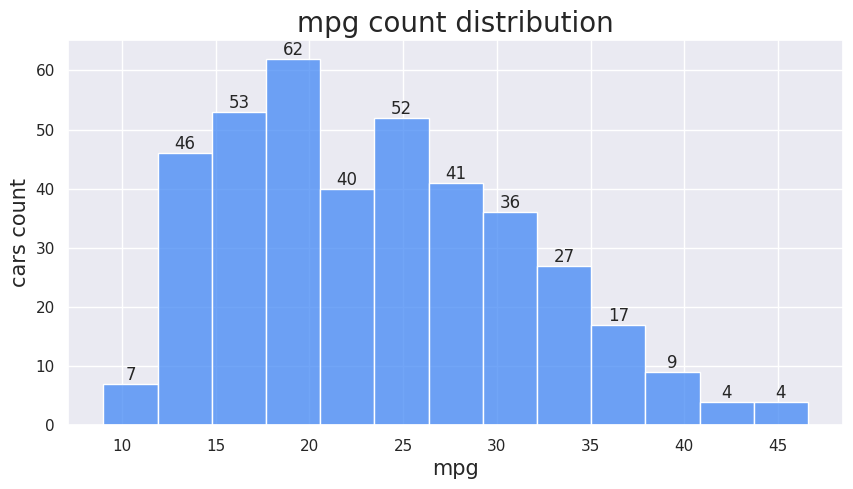

In [32]:
# ploting mpg distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("mpg count distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

* Most of the cars in our dataset have mpg between 15 to 20. Our data is also skewed to the right.

* let's compare these findings to cylinders and horsepower columns

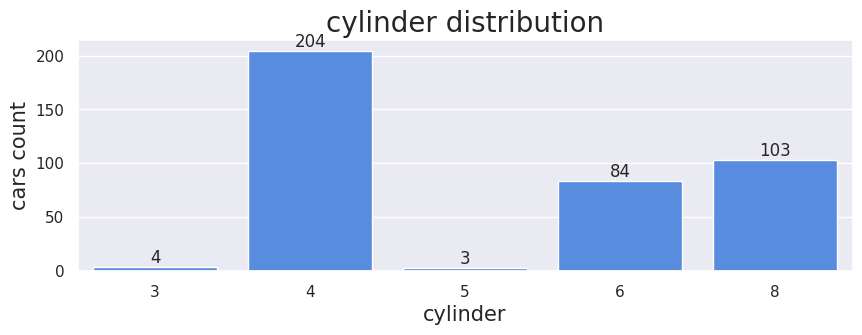

In [33]:
# displaying cylinder column distribution
plt.figure(figsize=(10,3))
ax = sns.countplot(x = 'cylinders', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("cylinder distribution", fontsize = 20)
plt.xlabel("cylinder", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

The vast majority in cars have 4 cylinder engine.

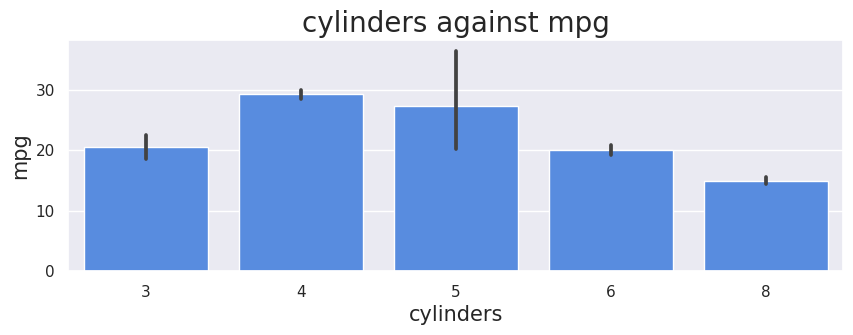

In [34]:
# ploting clynders against mpg
plt.figure(figsize=(10,3))
sns.barplot(x = 'cylinders', y = 'mpg', data = df, color = '#4287f5')
plt.title("cylinders against mpg", fontsize = 20)
plt.xlabel("cylinders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

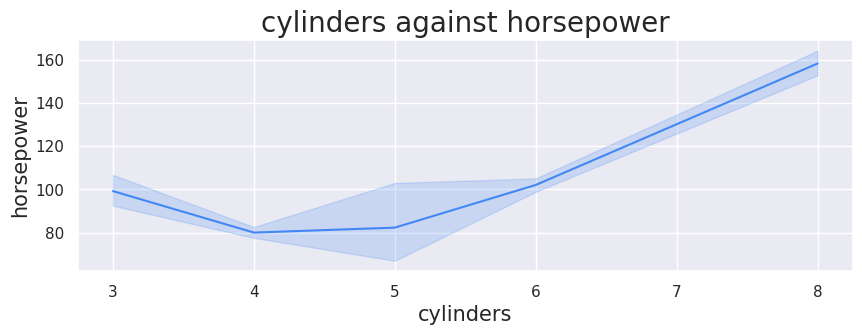

In [35]:
# ploting cylinders anainst horsepower
plt.figure(figsize=(10,3))
sns.lineplot(x = 'cylinders', y = 'horsepower', data = df, color = '#4287f5')
plt.title("cylinders against horsepower", fontsize = 20)
plt.xlabel("cylinders", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

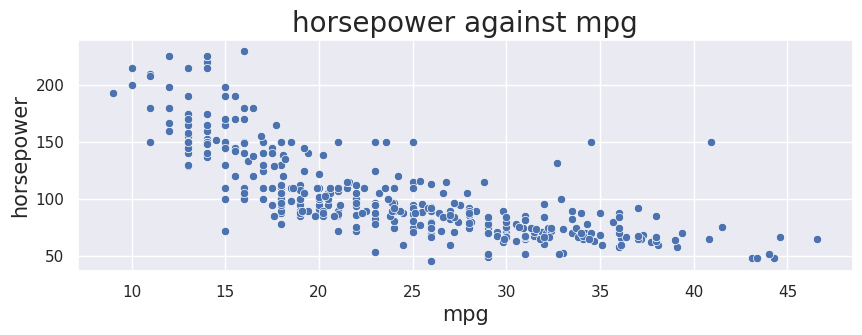

In [36]:
# ploting mpg against horsepower
plt.figure(figsize=(10,3))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = df)
plt.title("horsepower against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

From the above visuals, we can notice that:

* As cylinders in the engine increases above 4, MPG decreases.
* As cylinders in the engine increases above 4, engine horsepower increases.
* there is negative correlation between mpg and horsepower.

____________________________________________________________________________________________

Next, we'll move into exploring origin column and find insights about each manufacturing country.

In [37]:
origin_counts = df['origin'].value_counts()

In [38]:
origin_percentages = (origin_counts / origin_counts.sum()) * 100



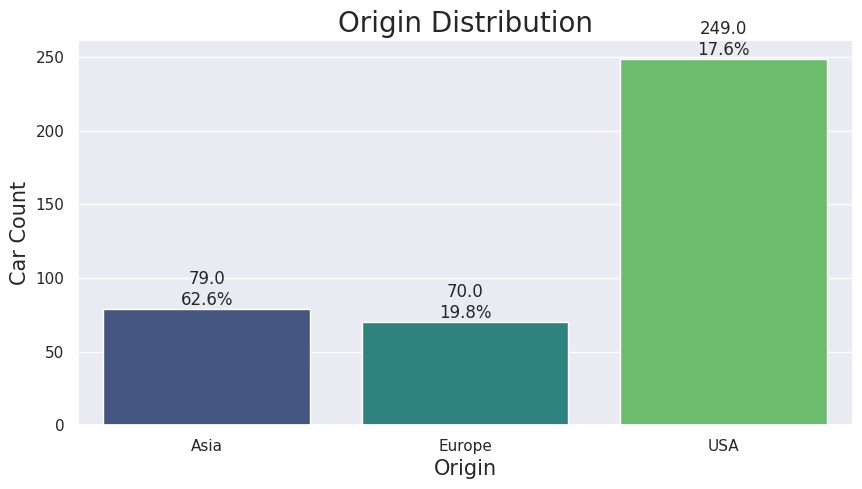

In [39]:
# Plotting cars origin distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='origin', data=df, palette='viridis')

# Add counts and percentages to each bar
for container in ax.containers:
    labels = [f'{count}\n{percentage:.1f}%' for count, percentage in zip(container.datavalues, origin_percentages)]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.title("Origin Distribution", fontsize=20)
plt.xlabel("Origin", fontsize=15)
plt.ylabel("Car Count", fontsize=15)
plt.show()

We can see that USA alne produces more than 63% of the total cars in our dataset.

----------------------------------------------------------------------------------------------------------------

# Let's explore its relations between other columns.

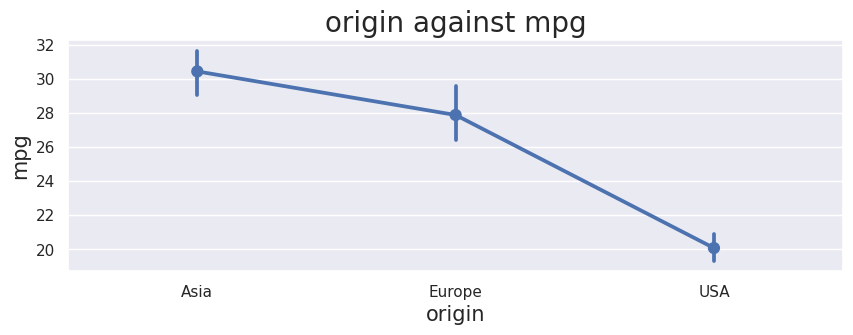

In [40]:
# ploting origin anainst mpg
plt.figure(figsize=(10,3))
sns.pointplot(x = 'origin', y = 'mpg', data =df)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

Althogh USA has the biggest count of our dataset, it produces cars we relatively very low mpg compared to Asia and Europe
Asia is the leading contry in producing cars with high mpg with a mean close to 30.

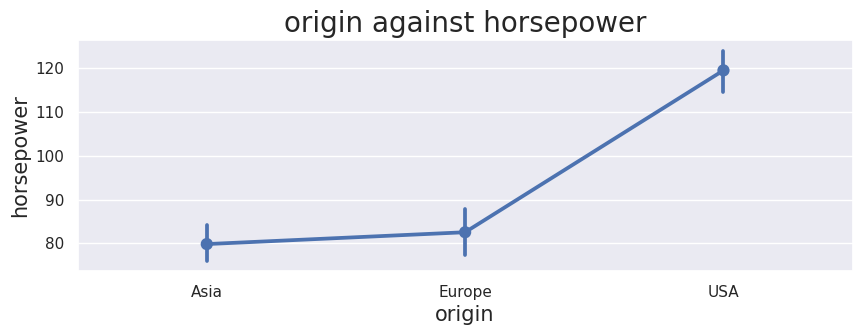

In [41]:
# ploting origin anainst horsepower
plt.figure(figsize=(10,3))
sns.pointplot(x = 'origin', y = 'horsepower', data = df)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

As expected, USA has the highest engine horsepower. This implies the previously observed conclusion that hoursepower and mpg has a negative correlation.

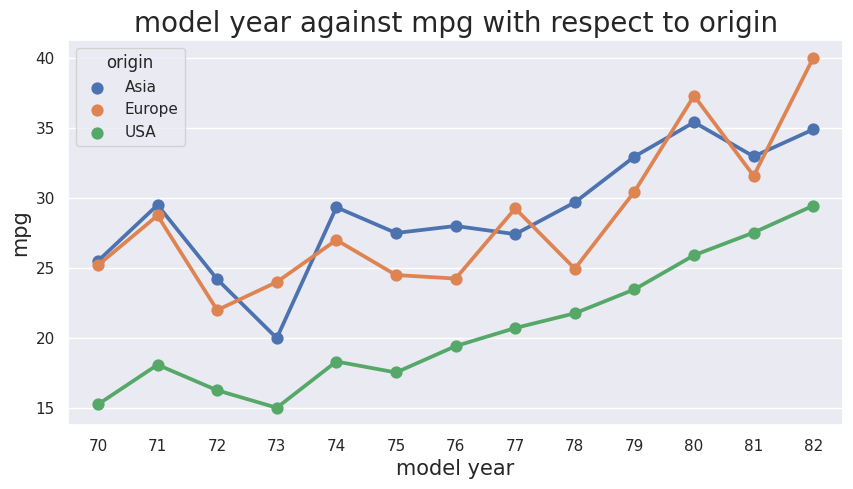

In [42]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = df, ci = None);
plt.title("model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

This chart also implies the positive correlation between model year and mpg, and shows that Asia has been leading country in this industry, followed by Europe and USA comes in the last place.

Let's now explore how weight has been affecting our car specs over the years.

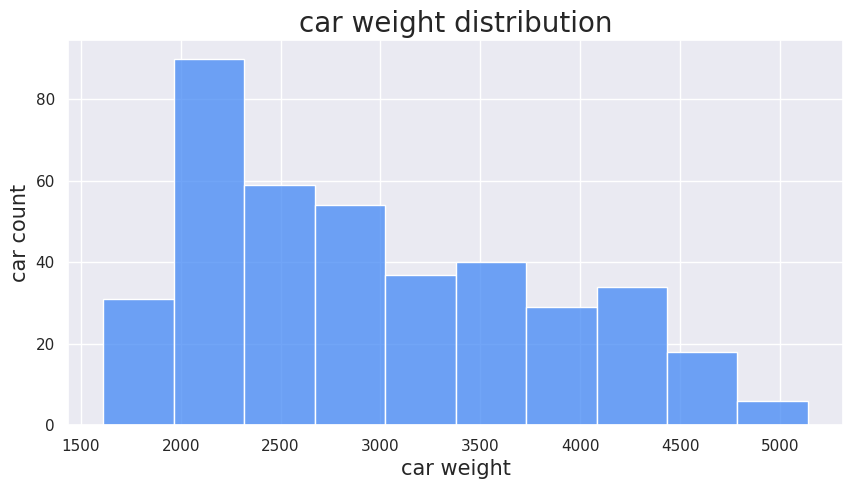

In [43]:
# plot a dist. of car weight
plt.figure(figsize=(10,5))
sns.histplot(x = 'weight', data = df, color = '#4287f5')
plt.title("car weight distribution", fontsize = 20)
plt.xlabel("car weight", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

car weight varies from 1500 to 5000, with the majority of cars at 2000.

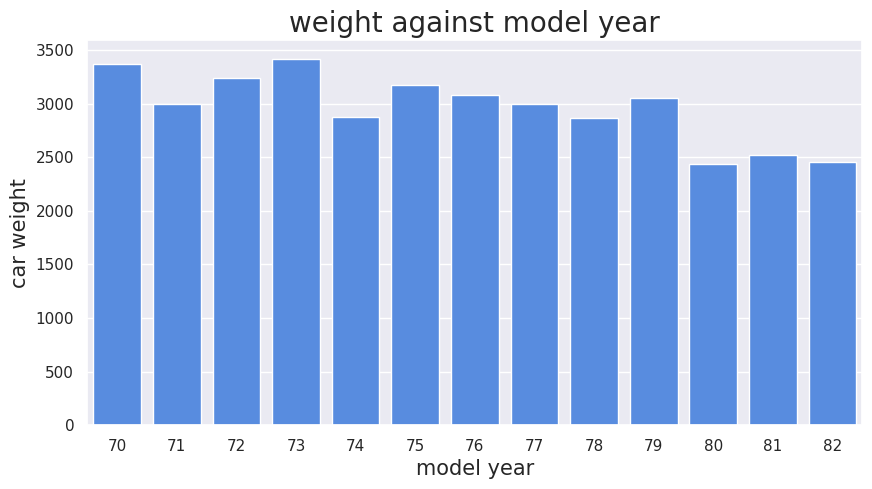

In [44]:
# plotting weight against model year
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'model year', y = 'weight', data = df,
                 color = '#4287f5', ci = None)
plt.title("weight against model year", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

Car weight has been decreasing over the years.

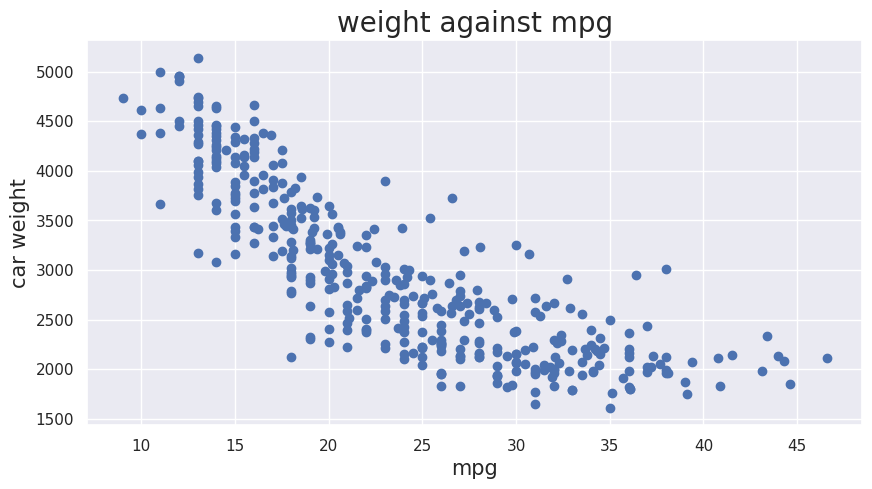

In [45]:
# plotting weight against mpg
plt.figure(figsize=(10,5))
plt.scatter(x = 'mpg', y = 'weight', data = df)
plt.title("weight against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

mpg inceases as weight decreses over time, that indecates a stron correlation between them.

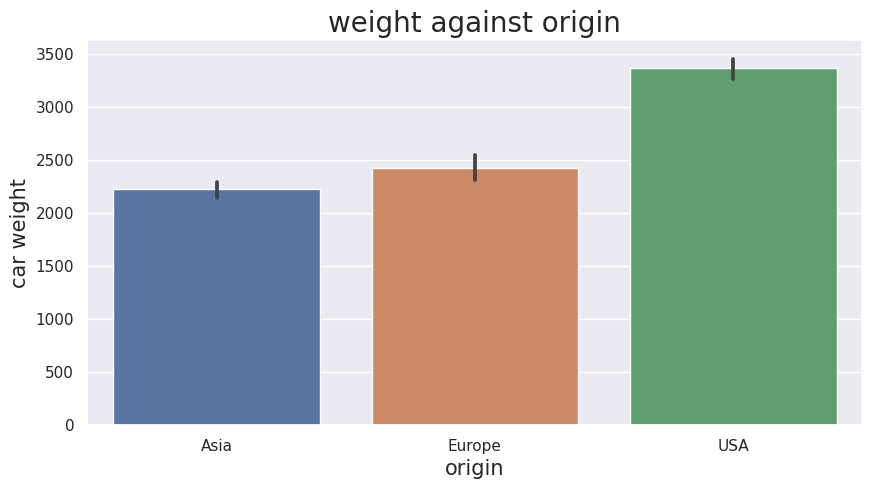

In [46]:
# plotting weight against origin
plt.figure(figsize=(10,5))
sns.barplot(x = 'origin', y = 'weight', data = df)
plt.title("weight against origin", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

* As expected, USA gets the highest possible weight values, that explains alot about its low mpg and high horsepower.
* Asia produces the lightest cars campared to USA and Europe, this also explains itss high mpg and low horsepower.

-------------------------------------------------------------------------------------------------------------

Let's take a final look at acceleration column, and how it is related to horsepower and mpg to get a better understanding of our findings.

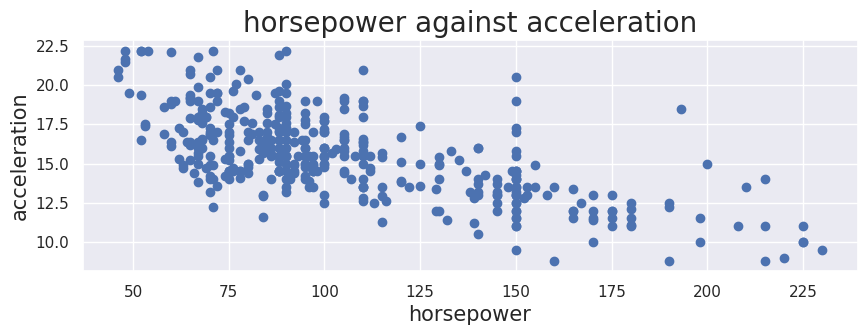

In [47]:
# plotting horsepower against acceleration
plt.figure(figsize=(10,3))
plt.scatter(x = 'horsepower', y = 'acceleration', data = df)
plt.title("horsepower against acceleration", fontsize = 20)
plt.xlabel("horsepower", fontsize = 15)
plt.ylabel("acceleration", fontsize = 15)
plt.show()

Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.

-----------------------------------------------------------------------------------------------------------

# **Conclusion**

* In this section, we'd add the conclusions we draw from the previous visualisations.

* As years pass after 1973, there has been a noticable increase in mpg.
* As cylinders in the engine increases above 4, MPG decreases and engine horsepower increases. That indicates negative correlation between mpg and horsepower.
* mpg increases as weight decreses over time, that also indecates a stron correlation between them.
* Althogh USA has the biggest count of produced cars, its cars has relatively very low mpg, thus the highest possible weight compared to Asia and Europe
* Asia is the leading contry in producing cars with high mpg with a mean close to 30, and it produces the lightest cars.
* Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.

# Using Regression Techn's for model Building

# The origin column should be treated as a categorical variable and encoded using One-Hot Encoding (OHE).

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 398 entries, 0 to 397

Data columns (total 8 columns):

 #   Column        Non-Null Count  Dtype   

---  ------        --------------  -----   

 0   mpg           398 non-null    float64 

 1   cylinders     398 non-null    int64   

 2   displacement  398 non-null    float64 

 3   horsepower    398 non-null    int64   

 4   weight        398 non-null    int64   

 5   acceleration  398 non-null    float64 

 6   model year    398 non-null    int64   

 7   origin        398 non-null    category

dtypes: category(1), float64(3), int64(4)

memory usage: 22.4 KB


In [49]:
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

In [50]:
# displaying summary statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.155779,2970.424623,15.552010,76.010050
std,7.815984,1.701004,104.269838,38.600986,846.841774,2.693089,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.800000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,22.200000,82.000000


In [51]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_USA
0,18.0,8,307.0,130,3504,12.0,70,False,True
1,15.0,8,350.0,165,3693,11.5,70,False,True
2,18.0,8,318.0,150,3436,11.0,70,False,True
3,16.0,8,304.0,150,3433,12.0,70,False,True
4,17.0,8,302.0,140,3449,10.5,70,False,True


<Axes: >

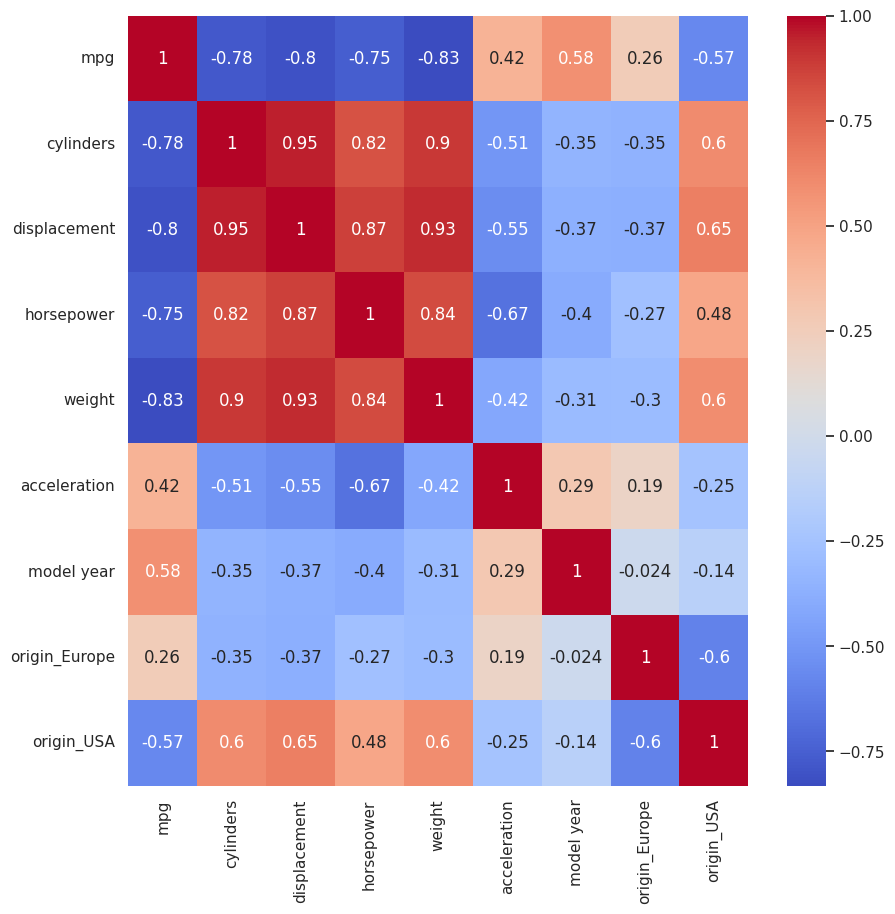

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**Observations**:

* There are strong Positive correlations between weight , horsepower, displacement, cylindrers.
* This makes sense, because for example the more cylinders the car have the more horsepower.

* There are strong Negative correlations between mpg and each of the following [weight, horsepower, displacement, cylindrers].
* This is reasonable, becauser when the car is more powerful it requires more gallons.

# **Split the data into independent and dependent variable**

In [53]:
x = df.drop(['mpg'], axis=1)
y = df[['mpg']]

In [54]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_USA
0,8,307.0,130,3504,12.0,70,False,True
1,8,350.0,165,3693,11.5,70,False,True
2,8,318.0,150,3436,11.0,70,False,True
3,8,304.0,150,3433,12.0,70,False,True
4,8,302.0,140,3449,10.5,70,False,True


In [55]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


# **Feature Scaling**

# NOTE: You can handle 'feature scaling' before splitting the data into Depe & Inde ( your choice )

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [57]:
pd.DataFrame(x_scaler).head()

,0,1,2,3,4,5,6,7
0,1.498191,1.090604,0.644426,0.630870,-1.320595,-1.627426,-0.461968,0.773559
1,1.498191,1.503514,1.552280,0.854333,-1.506489,-1.627426,-0.461968,0.773559
2,1.498191,1.196232,1.163200,0.550470,-1.692383,-1.627426,-0.461968,0.773559
3,1.498191,1.061796,1.163200,0.546923,-1.320595,-1.627426,-0.461968,0.773559
4,1.498191,1.042591,0.903813,0.565841,-1.878278,-1.627426,-0.461968,0.773559


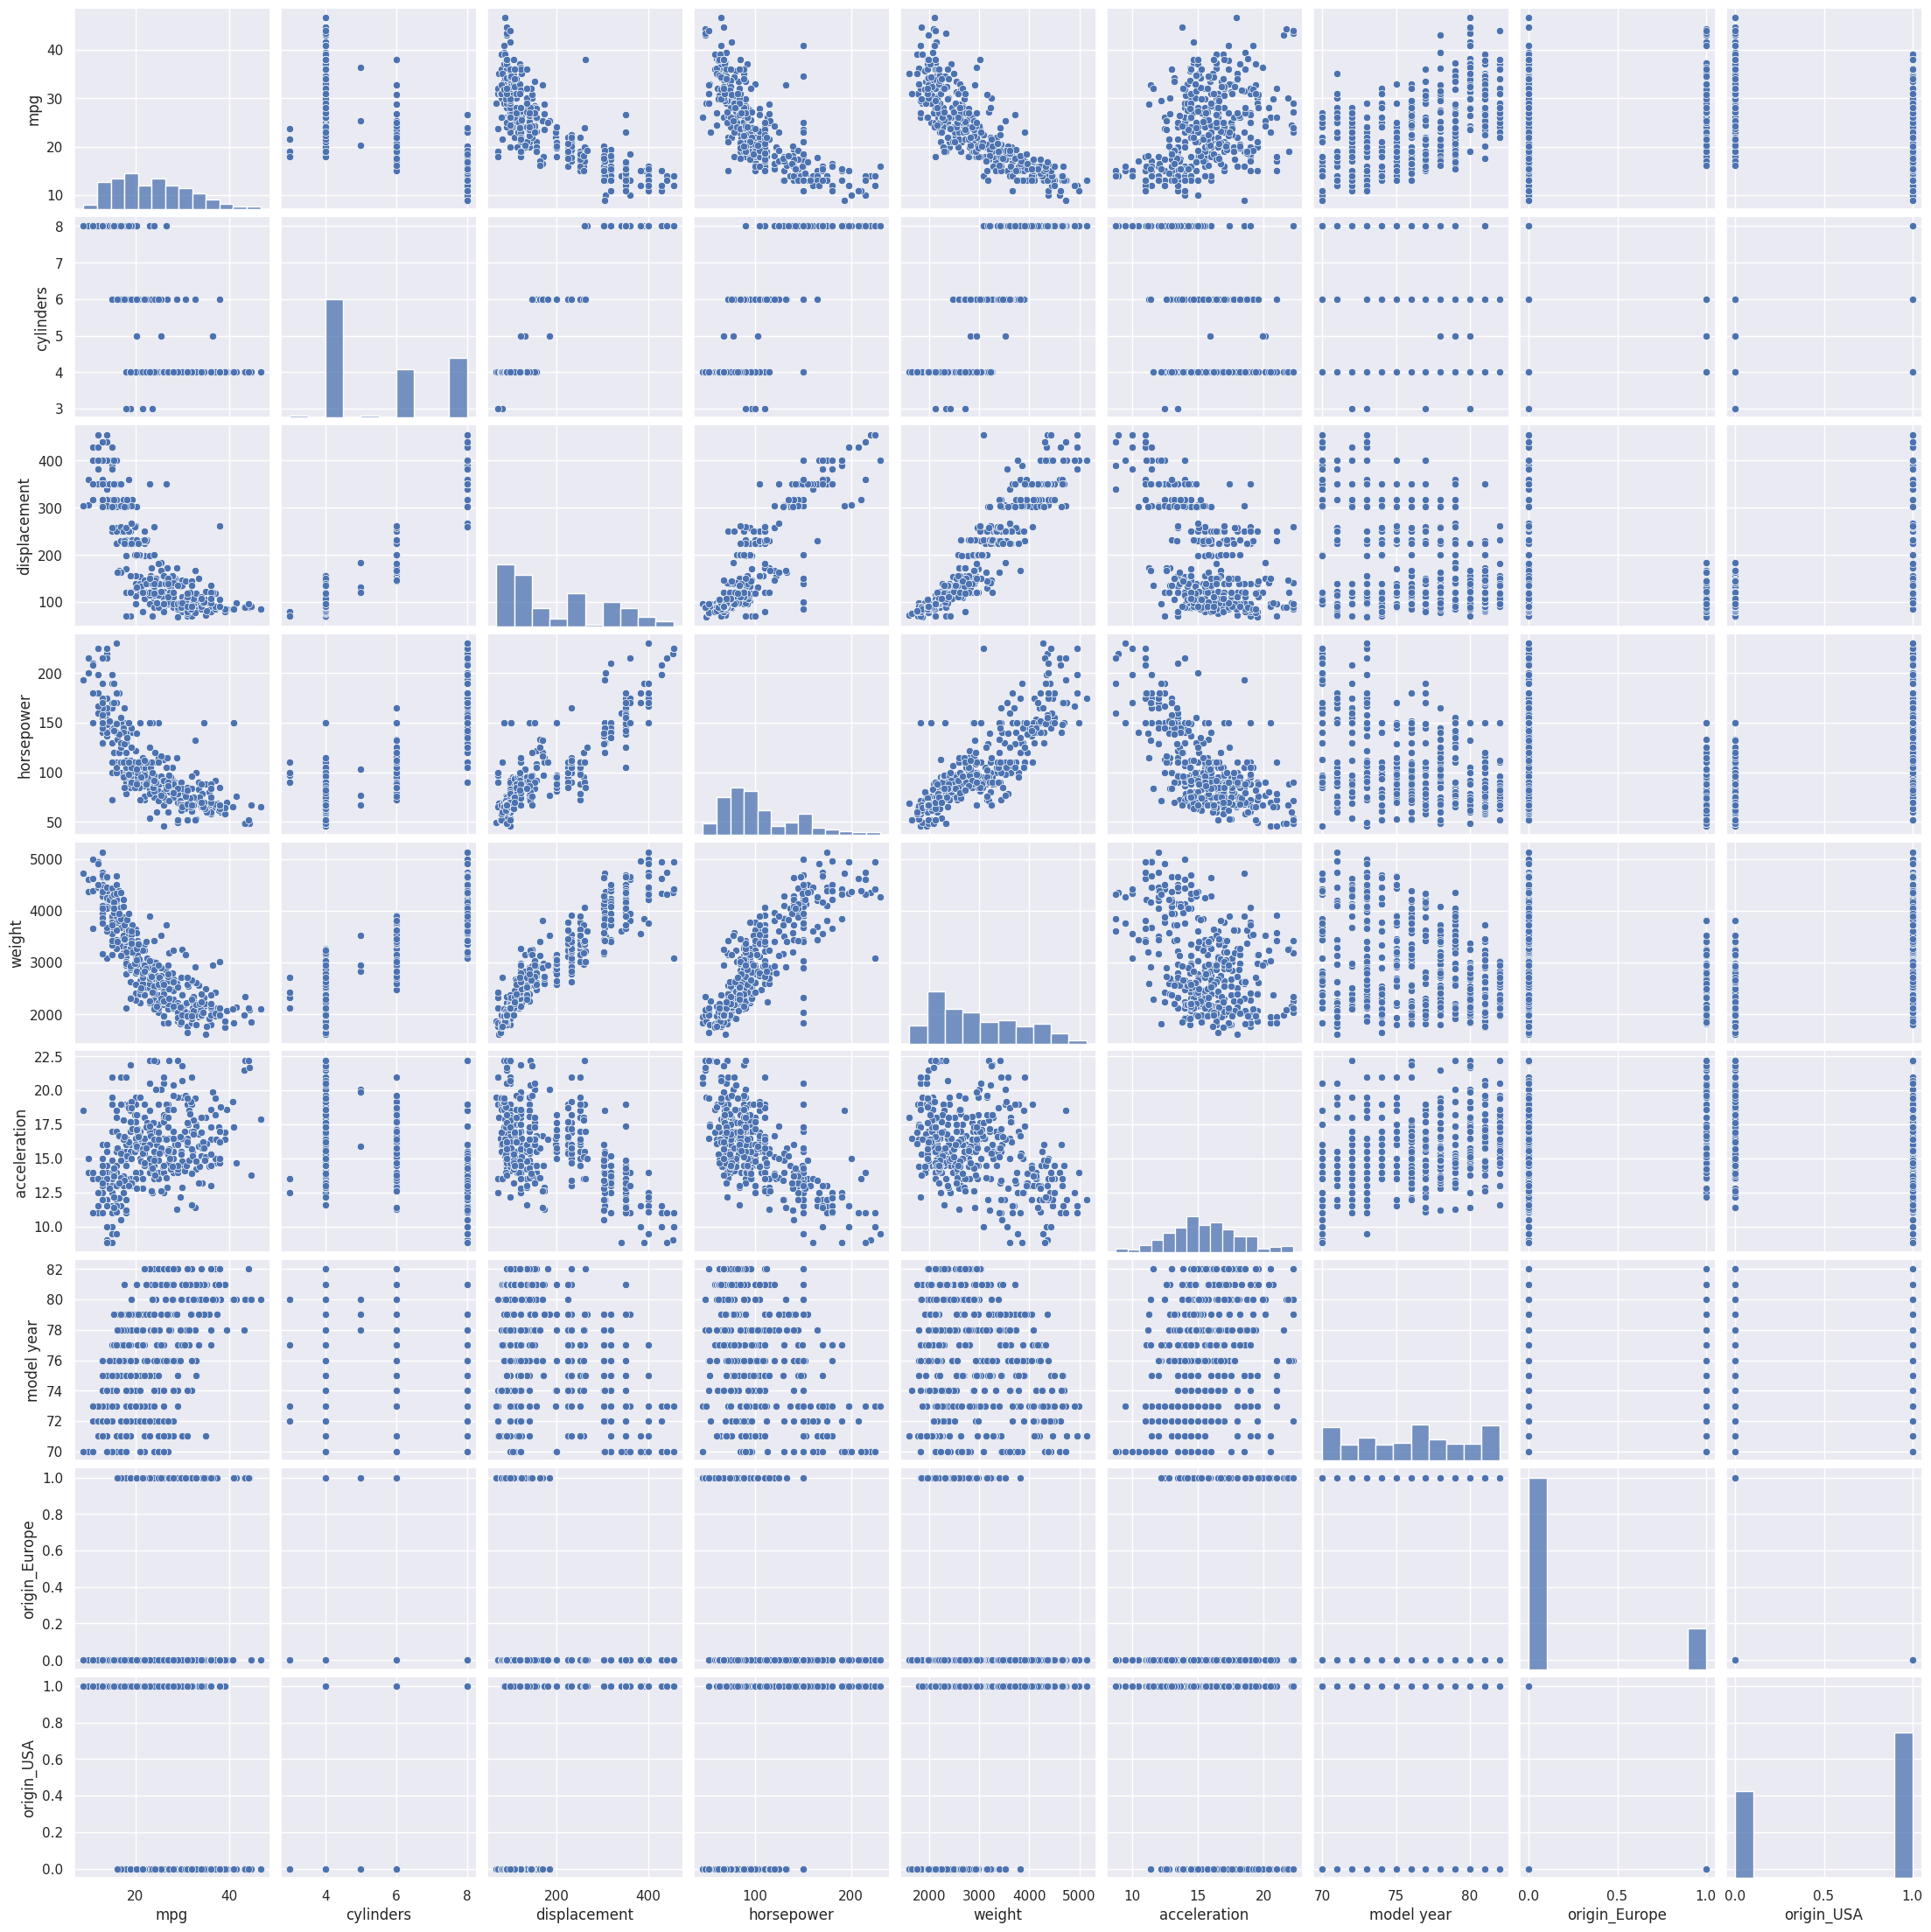

In [58]:
sns.pairplot(df)

# Split the data into train and test

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# sklearn linear regression model

In [60]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred_train =lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [62]:
# evaluate the model
from sklearn.metrics import r2_score

In [63]:
print("Training Accuracy ", r2_score(y_train, y_pred_train))
print("****************"*10)
print("Test Accuracy ", r2_score(y_test, y_pred_test))

Training Accuracy  0.8250687221076405

****************************************************************************************************************************************************************

Test Accuracy  0.8180506704773132


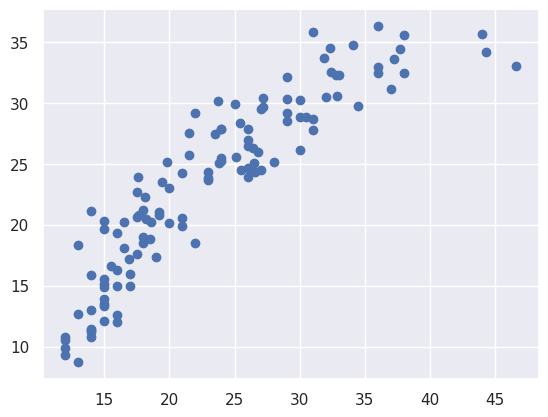

In [64]:
# Linearity
plt.scatter(y_test, y_pred_test)

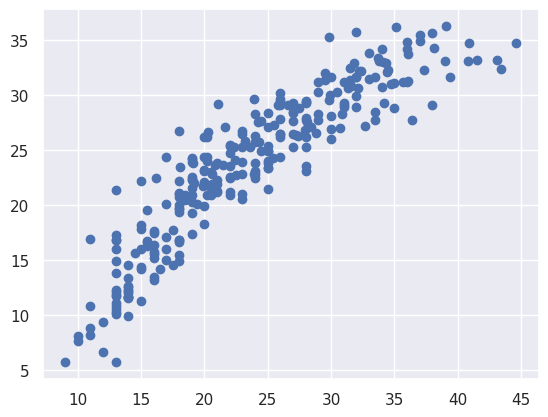

In [65]:
plt.scatter(y_train, y_pred_train)

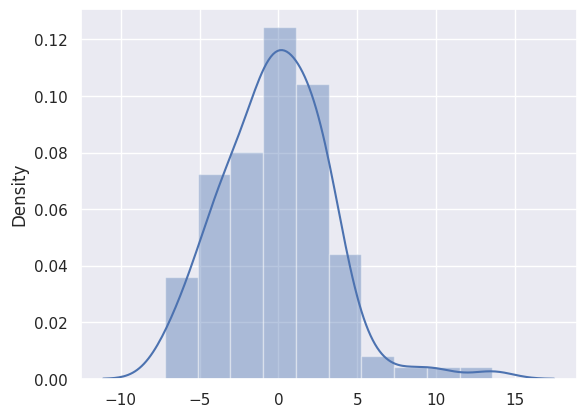

In [66]:
# Residual - normality

sns.distplot((y_test - y_pred_test), bins=10)

plt.show()

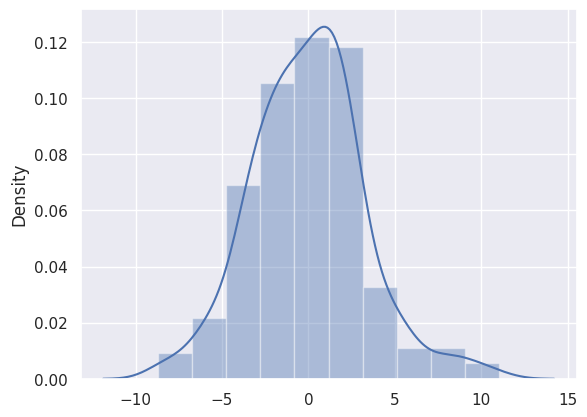

In [67]:
sns.distplot((y_train - y_pred_train), bins=10)

plt.show()

# **Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [69]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [70]:
# evaluate the model on training sample
dtr.score(x_train,y_train)


0.8247416671013563

In [71]:
dtr.score(x_test, y_test)

0.7842249637417211

# **cross validate model on train sample**

In [72]:

from sklearn.model_selection import cross_validate
cross_validate(dtr, x_train, y_train, cv=5)

{'fit_time': array([0.00542998, 0.00327945, 0.00325966, 0.00319076, 0.00321603]),
 'score_time': array([0.00244689, 0.00216556, 0.00217652, 0.0022316 , 0.0021534 ]),
 'test_score': array([0.82051037, 0.5943357 , 0.77651577, 0.66046373, 0.81332927])}

# RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [74]:
y_pred_train_rf = rf_reg.predict(x_train)
y_pred_test_rf = rf_reg.predict(x_test)

In [75]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_rf))

Training Accuracy : 0.9818613524273286



Test Accuracy : 0.9030804893974065


# Ridge method

In [76]:
from sklearn.linear_model import Ridge

In [77]:
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)

Ridge(alpha=0.3)

In [78]:
y_pred_train_rd =ridge.predict(x_train)
y_pred_test_rd = ridge.predict(x_test)

In [79]:
print("Training Accuracy ", r2_score(y_train, y_pred_train_rd))
print("****************"*10)
print("Test Accuracy ", r2_score(y_test, y_pred_test_rd))

Training Accuracy  0.8250677031917399

****************************************************************************************************************************************************************

Test Accuracy  0.8179921784750466


# Lasso

In [80]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [81]:
y_pred_train_ls =lasso.predict(x_train)
y_pred_test_ls = lasso.predict(x_test)

In [82]:
print("Training Accuracy ", r2_score(y_train, y_pred_train_ls))
print("****************"*10)
print("Test Accuracy ", r2_score(y_test, y_pred_test_ls))

Training Accuracy  0.8225635377528084

****************************************************************************************************************************************************************

Test Accuracy  0.8173586726858395


# Gradient Descent - Optimization method

In [83]:
pd.DataFrame(x_scaler).head()

,0,1,2,3,4,5,6,7
0,1.498191,1.090604,0.644426,0.630870,-1.320595,-1.627426,-0.461968,0.773559
1,1.498191,1.503514,1.552280,0.854333,-1.506489,-1.627426,-0.461968,0.773559
2,1.498191,1.196232,1.163200,0.550470,-1.692383,-1.627426,-0.461968,0.773559
3,1.498191,1.061796,1.163200,0.546923,-1.320595,-1.627426,-0.461968,0.773559
4,1.498191,1.042591,0.903813,0.565841,-1.878278,-1.627426,-0.461968,0.773559


In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=101)

In [85]:
from sklearn.linear_model import SGDRegressor

In [86]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)

SGDRegressor()

In [87]:
y_pred_train_sgd = sgd.predict(x_train)
y_pred_test_sgd = sgd.predict(x_test)

In [88]:
print(r2_score(y_train, y_pred_train_sgd))
print()
print(r2_score(y_test, y_pred_test_sgd))

0.8191323028968047



0.8164369007790224


# **Measurements**

In [89]:
from sklearn import metrics

In [90]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_test))

MAE : 2.5973960756122056


In [91]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred_test) )

MSE : 11.403319300288123


In [92]:
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE : 3.3768801134017363


# All the best #